In [5]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\adity\OneDrive\Desktop\Car price prediction\car data (1).csv"
car_data = pd.read_csv(file_path)

# Display the first few rows and summary information
car_data_head = car_data.head()
car_data_info = car_data.info()

car_data_head, car_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Selling_type Transmission  Owner  
 0       Dealer       Manual      0  
 1       Dealer       Manual      0  
 2       Dealer       Manual      0  
 3       Dealer       Manual      0  
 4       Dealer       Manual      0  ,
 None)

In [6]:
# Check for missing values and basic statistics of the dataset
missing_values = car_data.isnull().sum()
statistics = car_data.describe()

missing_values, statistics


(Car_Name         0
 Year             0
 Selling_Price    0
 Present_Price    0
 Driven_kms       0
 Fuel_Type        0
 Selling_type     0
 Transmission     0
 Owner            0
 dtype: int64,
               Year  Selling_Price  Present_Price     Driven_kms       Owner
 count   301.000000     301.000000     301.000000     301.000000  301.000000
 mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
 std       2.891554       5.082812       8.642584   38886.883882    0.247915
 min    2003.000000       0.100000       0.320000     500.000000    0.000000
 25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
 50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
 75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
 max    2018.000000      35.000000      92.600000  500000.000000    3.000000)

In [7]:
from datetime import datetime

# Feature Engineering: Add 'Car_Age' column
current_year = datetime.now().year
car_data['Car_Age'] = current_year - car_data['Year']

# Drop the 'Car_Name' and 'Year' columns (unnecessary for modeling)
car_data = car_data.drop(['Car_Name', 'Year'], axis=1)

# Encode categorical variables using one-hot encoding
car_data_encoded = pd.get_dummies(car_data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Display the processed dataset's first few rows and column names
car_data_encoded_head = car_data_encoded.head()
car_data_encoded_columns = car_data_encoded.columns.tolist()

car_data_encoded_head, car_data_encoded_columns


(   Selling_Price  Present_Price  Driven_kms  Owner  Car_Age  Fuel_Type_Diesel  \
 0           3.35           5.59       27000      0       11             False   
 1           4.75           9.54       43000      0       12              True   
 2           7.25           9.85        6900      0        8             False   
 3           2.85           4.15        5200      0       14             False   
 4           4.60           6.87       42450      0       11              True   
 
    Fuel_Type_Petrol  Selling_type_Individual  Transmission_Manual  
 0              True                    False                 True  
 1             False                    False                 True  
 2              True                    False                 True  
 3              True                    False                 True  
 4             False                    False                 True  ,
 ['Selling_Price',
  'Present_Price',
  'Driven_kms',
  'Owner',
  'Car_Age',
  'Fuel_Type_

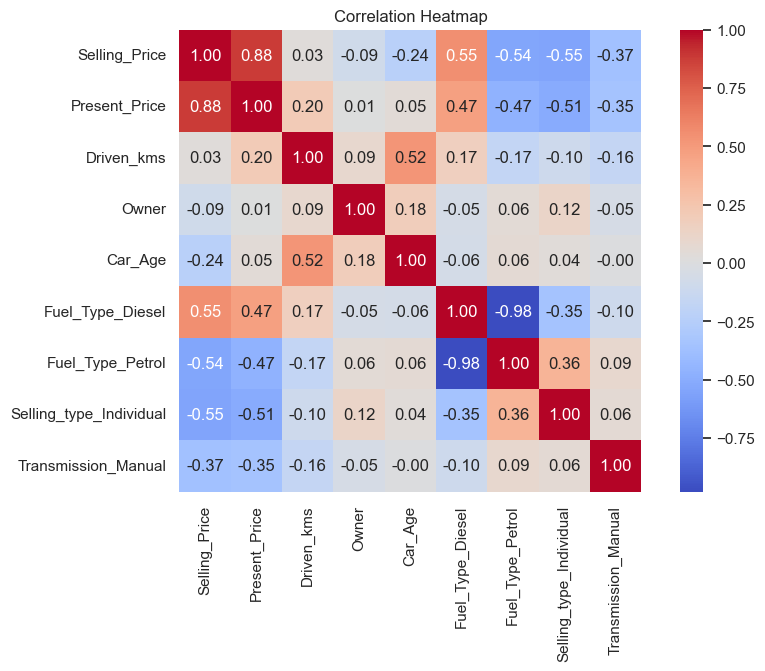

<Figure size 1200x600 with 0 Axes>

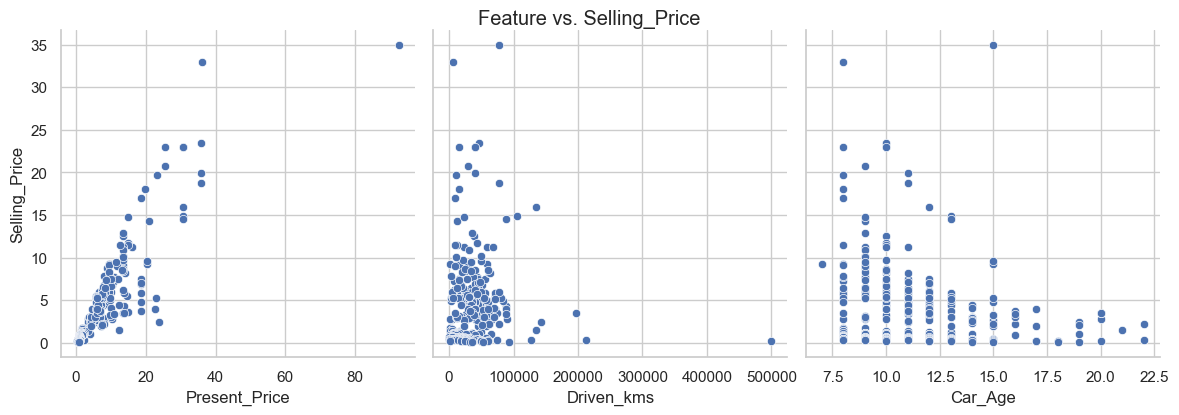

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visualize correlations between numerical features and Selling_Price
plt.figure(figsize=(10, 6))
correlation_matrix = car_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for relationships between features and Selling_Price
plt.figure(figsize=(12, 6))
sns.pairplot(car_data_encoded, x_vars=['Present_Price', 'Driven_kms', 'Car_Age'], y_vars='Selling_Price', height=4, aspect=1)
plt.suptitle("Feature vs. Selling_Price", y=1.02)
plt.show()


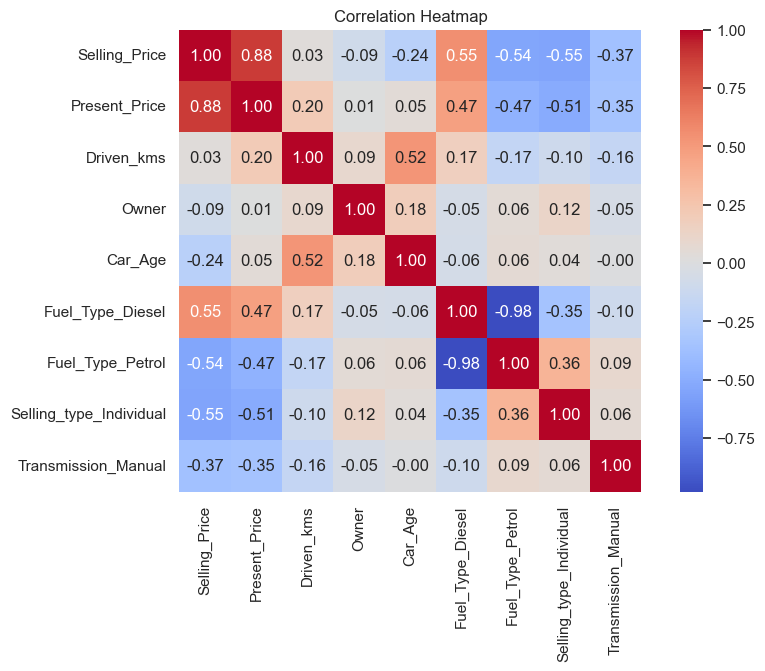

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot heatmap for correlations
plt.figure(figsize=(10, 6))
correlation_matrix = car_data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


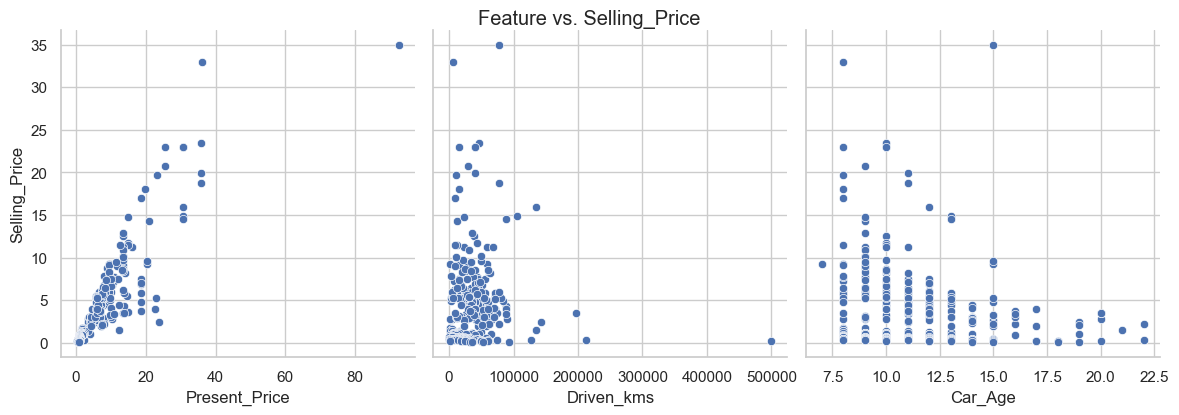

In [10]:
sns.pairplot(
    car_data_encoded, 
    x_vars=['Present_Price', 'Driven_kms', 'Car_Age'], 
    y_vars='Selling_Price', 
    height=4, 
    aspect=1
)
plt.suptitle("Feature vs. Selling_Price", y=1.02)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = car_data_encoded.drop('Selling_Price', axis=1)
y = car_data_encoded['Selling_Price']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 3.48
R-squared: 0.85


In [12]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [16]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and preprocess data
data = pd.read_csv(r"C:\Users\adity\OneDrive\Desktop\Car price prediction\car data (1).csv")
current_year = 2025
data['Car_Age'] = current_year - data['Year']
data = data.drop(['Car_Name', 'Year'], axis=1)
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Streamlit App
st.title("Car Price Prediction App")
st.write("Enter the details of the car to predict its price.")

# Input fields for user data
present_price = st.number_input("Present Price (in lakhs)", min_value=0.0, step=0.1)
driven_kms = st.number_input("Driven Kilometers", min_value=0, step=100)
owner = st.selectbox("Number of Owners", [0, 1, 2, 3])
car_age = st.number_input("Car Age (in years)", min_value=0, step=1)
fuel_type = st.selectbox("Fuel Type", ["Petrol", "Diesel", "CNG"])
transmission = st.selectbox("Transmission", ["Manual", "Automatic"])
seller_type = st.selectbox("Seller Type", ["Dealer", "Individual"])

# Encode inputs
fuel_type_diesel = 1 if fuel_type == "Diesel" else 0
fuel_type_petrol = 1 if fuel_type == "Petrol" else 0
seller_type_individual = 1 if seller_type == "Individual" else 0
transmission_manual = 1 if transmission == "Manual" else 0

# Predict price
if st.button("Predict Price"):
    features = np.array([[present_price, driven_kms, owner, car_age, fuel_type_diesel,
                          fuel_type_petrol, seller_type_individual, transmission_manual]])
    prediction = model.predict(features)
    st.success(f"Estimated Selling Price: ₹{prediction[0]:,.2f} lakhs")


KeyboardInterrupt: 

In [17]:
print(X.dtypes)


Present_Price              float64
Driven_kms                   int64
Owner                        int64
Car_Age                      int64
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Selling_type_Individual       bool
Transmission_Manual           bool
dtype: object


In [18]:
features = np.array([[present_price, driven_kms, owner, car_age,
                      fuel_type_diesel, fuel_type_petrol,
                      seller_type_individual, transmission_manual]], dtype=float)


In [19]:
if st.button("Predict Price"):
    # Convert inputs to the correct format
    features = np.array([[present_price, driven_kms, owner, car_age,
                          fuel_type_diesel, fuel_type_petrol,
                          seller_type_individual, transmission_manual]], dtype=float)
    
    # Make prediction
    prediction = model.predict(features)
    
    # Display the prediction
    st.success(f"Estimated Selling Price: ₹{prediction[0]:,.2f} lakhs")


2025-01-08 23:34:10.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 23:34:10.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 23:34:10.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 23:34:10.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-08 23:34:10.824 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
